In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaned_split_audio.csv')
df.head()

,audio_path,temp
0,data/split_audio/01_Rocket_And_The_Ghost_Albuq...,65
1,data/split_audio/01_Rocket_And_The_Ghost_Albuq...,65
2,data/split_audio/01_Rocket_And_The_Ghost_Albuq...,65
3,data/split_audio/01_Rocket_And_The_Ghost_Albuq...,65
4,data/split_audio/01_Rocket_And_The_Ghost_Albuq...,65


In [7]:
df['temp'] = df['temp'] // 10

In [13]:
class_distribution = df['temp'].value_counts()

class_distribution

temp
8     2191
7      917
6      834
5      437
1      399
4      356
3      296
2      123
9      103
10      23
0       10
Name: count, dtype: int64

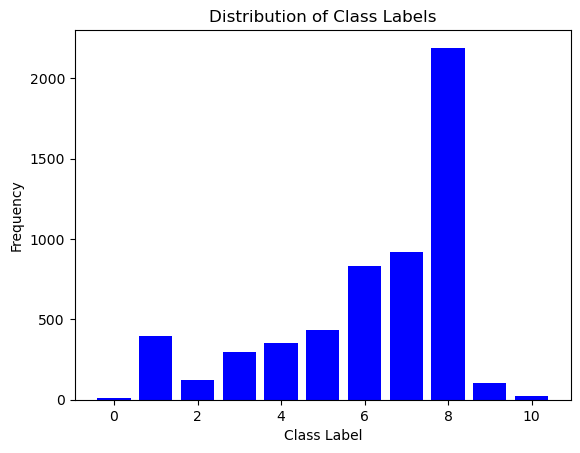

In [16]:
plt.bar(class_distribution.index, class_distribution.values, color='blue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Class Labels')
plt.show()

In [66]:
df = pd.read_csv('../data/raw-recordings.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6829 entries, 0 to 6828
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Filename                          6829 non-null   object
 1   Recording_S3_LocationLink         6828 non-null   object
 2   Streamable_S3_Key                 6829 non-null   object
 3   Recordings                        6795 non-null   object
 4   brightness                        6765 non-null   object
 5   bp.Conventions (from Recordings)  6403 non-null   object
dtypes: object(6)
memory usage: 320.2+ KB


In [68]:
df.dropna(inplace=True)

In [69]:
def clean(value):
   return value.isnumeric()

df =  df[df['brightness'].apply(clean)]
df['brightness'] = df['brightness'].astype(int) // 10
df = df[df['brightness'].between(0, 10)]
df['brightness'].value_counts()


# brightness is very unbalanced too

brightness
7     1366
6     1156
8     1118
3      665
5      646
4      599
2      316
1      272
9      161
0       74
10      27
Name: count, dtype: int64

In [87]:
# drop 0 and 10 classes 
df = df[df['brightness'].isin([0, 10]) == False]
    
df['brightness'].value_counts()

brightness
7    1366
6    1156
8    1118
3     665
5     646
4     599
2     316
1     272
9     161
Name: count, dtype: int64

In [90]:
# the the class with the least count
min_count = df['brightness'].value_counts().min()

# balance out brightness class

def balance(x):
    return x.sample(min(len(x),min_count))
    
bal_df = df.groupby('brightness').apply(balance).reset_index(drop=True)
bal_df['brightness'].value_counts()

brightness
1    161
2    161
3    161
4    161
5    161
6    161
7    161
8    161
9    161
Name: count, dtype: int64

### Below we have a balanced dataset on brightness

In [94]:
bal_df.to_csv('../data/balanced_brightness.csv')

### After split

we had to download these files from s3. Some of them failed to download. We also split the audio files in 10 second chunks. Some tracks are longer then the other so this may unbalance the dataset from the above

In [99]:
split_df = pd.read_csv('../data/balanced_brightness_split.csv')

plit_df['brightness'].value_counts()



,audio_path,temp
0,data/balanced_audio_split/AFSP_Ford_TremDaVida...,brightness
1,data/balanced_audio_split/AFSP_Ford_TremDaVida...,brightness
2,data/balanced_audio_split/AFSP_Ford_TremDaVida...,brightness
3,data/balanced_audio_split/AFSP_Ford_TremDaVida...,brightness
4,data/balanced_audio_split/AFSP_Ford_TremDaVida...,brightness
...,...,...
7321,data/balanced_audio_split/HappyFamilyYogurt_An...,brightness
7322,data/balanced_audio_split/HappyFamilyYogurt_An...,brightness
7323,data/balanced_audio_split/HappyFamilyYogurt_An...,brightness
7324,data/balanced_audio_split/HappyFamilyYogurt_An...,brightness
